## Data preprocessing

In [1]:
import movekit as mkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Read data input

In [2]:
# Enter path to CSV file
path = "./datasets/fish-5.csv"

# Alternative: enter path to Excel file
# path = "./datasets/fish-5.xlsx"

In [3]:
# Read in file using 
data = mkit.read_data(path)
data.head()

,time,animal_id,x,y
0,1,312,405.29,417.76
1,1,511,369.99,428.78
2,1,607,390.33,405.89
3,1,811,445.15,411.94
4,1,905,366.06,451.76


#### General preprocessing method 

In [4]:
# Simple call of the preprocessing method
preprocessed_data = mkit.preprocess(data)

Total number of missing values =  0
time         0
animal_id    0
x            0
y            0
dtype: int64


In [5]:
# OPTIONAL: more parameters to control the preprocessing of data

# preprocessed_data = mkit.preprocess(data, dropna=True, interpolation=False, limit=1, limit_direction="forward", inplace=False, method="linear", order=1, date_format=False)

# Paramters 
#  data: DataFrame to perform preprocessing on
#  dropna: Optional parameter to drop columns with  missing values for 'time' and 'animal_id'
#  interpolate: Optional parameter to perform linear interpolation
#  limit: Maximum number of consecutive NANs to fill
#  limit_direction: If limit is specified, consecutive NaNs will be filled in this direction.
#  method: Interpolation technique to use. Default is "linear".
#  order: To be used in case of polynomial and spline interpolation.
#  date_format: Boolean to define whether time is some kind of date format instead of a number.

#### Some additional methods to reduce the size of the data

Sometimes it can be useful to filter the data and analyze only a specific time period.

In [6]:
# filtering data frame: Extract records of assigned time frame from preprocessed movement record data.
# filtered_data = mkit.filter_dataframe(data, frm, to)

#Parameters
# data: DataFrame that is filtered
# frm: defining starting point of filtering. Note that if time is stored using datetime (if inputed data has time not stored as numeric type it is automatically converted to datetime)
# parameter has to be set using an datetime format: mkit.filter_dataframe(data, 2008-01-01, 2010-10-01)
# to: defining end point of filtering. Note that if time is stored using datetime (if inputed data has time not stored as numeric type it is automatically converted to datetime)
# parameter has to be set using an datetime format: mkit.filter_dataframe(data, 2008-01-01, 2010-10-01)
filtered_data = mkit.filter_dataframe(preprocessed_data, 5, 7)
filtered_data

,time,animal_id,x,y
20,5,312,405.29,416.71
21,5,511,369.99,428.86
22,5,607,389.98,405.87
23,5,811,446.24,413.42
24,5,905,365.47,451.76
25,6,312,405.27,416.61
26,6,511,369.98,428.84
27,6,607,389.88,405.87
28,6,811,446.42,413.86
29,6,905,365.39,451.76


If one has a large data set it can be efficient to decrease the size of the data set by sampling. One can do that either systematically or randomly.

In [7]:
# OPTIONAL: downsample the data at fixed time intervalls
# mkit.resample_systematic(data_groups, downsample_size)

#Parameters:
# data_groups: Dictionary with key: 'animal_id' and value with record data to that 'animal_id'.
# downsample_size: Int sample size to which each animal has to be reduced by downsampling.

#first grouping of the data
data_animal_id = preprocessed_data.groupby('animal_id')
data_animal_id_groups = {}
for animal_id in data_animal_id.groups.keys():
    data_animal_id_groups[animal_id] = data_animal_id.get_group(animal_id)
for animal_id in data_animal_id_groups.keys():
    data_animal_id_groups[animal_id].reset_index(drop=True, inplace=True)
#now downsampling
downsampled_data = mkit.resample_systematic(data_animal_id_groups, 5)
downsampled_data[312]

,time,animal_id,x,y
0,1,312,405.29,417.76
200,201,312,411.43,406.45
400,401,312,187.98,405.80
600,601,312,92.39,346.47
800,801,312,435.83,78.23


In [8]:
# OPTIONAL: downsample the data at random time intervalls
# mkit.resample_random(data_groups, downsample_size)

#Parameters:
# data_groups: Dictionary with key: 'animal_id' and value with record data to that 'animal_id'.
# downsample_size: Int sample size to which each animal has to be reduced by random downsampling.

#first grouping of the data
data_animal_id = preprocessed_data.groupby('animal_id')
data_animal_id_groups = {}
for animal_id in data_animal_id.groups.keys():
    data_animal_id_groups[animal_id] = data_animal_id.get_group(animal_id)
for animal_id in data_animal_id_groups.keys():
    data_animal_id_groups[animal_id].reset_index(drop=True, inplace=True)
#now downsampling
downsampled_data = mkit.resample_random(data_animal_id_groups, 5)
downsampled_data[312]

,time,animal_id,x,y
546,547,312,98.59,379.28
33,34,312,406.56,412.77
23,24,312,406.58,414.26
186,187,312,412.27,406.26
307,308,312,402.93,404.64


It might be useful to split the entire data frame into different smaller sub data frames for each animal.

In [9]:
# OPTIONAL: split the dataframe into different samller sub-dataframes for each animal
# mkit.split_trajectories(data_groups, segment, fuzzy_segment=0, csv=False)

# Parameters:
# data_groups: Dictionary with key 'animal_id' and value record data of 'animal_id'.
# segment: Int, defining point where the animals are split into several Pandas Data Frames.
# fuzzy_segment: Int, defining interval which will overlap on either side of the segments.
# csv: Boolean, defining if each interval shall be exported locally as singular csv

#first grouping of the data
data_animal_id = preprocessed_data.groupby('animal_id')
data_animal_id_groups = {}
for animal_id in data_animal_id.groups.keys():
    data_animal_id_groups[animal_id] = data_animal_id.get_group(animal_id)
for animal_id in data_animal_id_groups.keys():
    data_animal_id_groups[animal_id].reset_index(drop=True, inplace=True)

dict_with_diff_dataframes = mkit.split_trajectories(data_animal_id_groups, segment = 5, fuzzy_segment = 5)
dict_with_diff_dataframes.keys()

dict_keys(['group_312_df1', 'group_312_df2', 'group_312_df3', 'group_312_df4', 'group_312_df5', 'group_511_df1', 'group_511_df2', 'group_511_df3', 'group_511_df4', 'group_511_df5', 'group_607_df1', 'group_607_df2', 'group_607_df3', 'group_607_df4', 'group_607_df5', 'group_811_df1', 'group_811_df2', 'group_811_df3', 'group_811_df4', 'group_811_df5', 'group_905_df1', 'group_905_df2', 'group_905_df3', 'group_905_df4', 'group_905_df5'])

#### Methods to replace/convert specific values (duplicates, missings, selected values)

One can replace the coordinate values for a specific mover at a specific time period. This can be useful method to deal with outliers.

In [10]:
# replace specific coordinates from selected animals at a selected time
# mkit.replace_parts_animal_movement(data_animal_id_groups, animal_id, time_array,replacement_value_x, replacement_value_y, replacement_value_z=None)

#Parameters:
#data_groups: Dictionary with key 'animal_id'and value with records for 'animal_id'. (as dataframe)
#animal_id: Int defining 'animal_id' whose movements have to be replaced.
#time_array: Array defining time indices whose movements have to replaced.
#replacement_value_x: Int value that will replace all 'x' attribute values in 'time_array'.
#replacement_value_y: Int value that will replace all 'y' attribute values in 'time_array'.
#replacement_value_z: Int value that will replace all 'z' attribute values in 'time_array' if data is 3d.
#return: Dictionary with replaced subsets.

#first grouping of the data
data_animal_id = preprocessed_data.groupby('animal_id')
data_animal_id_groups = {}
for animal_id in data_animal_id.groups.keys():
    data_animal_id_groups[animal_id] = data_animal_id.get_group(animal_id)
for animal_id in data_animal_id_groups.keys():
    data_animal_id_groups[animal_id].reset_index(drop=True, inplace=True)
#now replacing values
arr_index = np.array([1, 19])
replaced_data_groups = mkit.replace_parts_animal_movement(data_animal_id_groups, 811, arr_index, 100, 90)
replaced_data_groups[811].head(20)

/Users/timkleinlein/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,time,animal_id,x,y
0,1,811,445.15,411.94
1,2,811,100.00,90.00
2,3,811,445.77,412.61
3,4,811,446.03,413.00
4,5,811,446.24,413.42
5,6,811,446.42,413.86
6,7,811,446.54,414.34
7,8,811,446.62,414.85
8,9,811,446.63,415.42
9,10,811,446.55,415.92


In many appliactions it is useful to normalize the data for the coordinates before the analysis. 

In [11]:
# OPTIONAL: normalize data
# mkit.normalize(data)

normalized_data = mkit.normalize(data)
normalized_data

,time,animal_id,x,y
0,1,312,0.496639,0.849376
1,1,511,0.446887,0.873750
2,1,607,0.475554,0.823122
3,1,811,0.552817,0.836504
4,1,905,0.441348,0.924578
...,...,...,...,...
4995,1000,312,0.941539,0.466381
4996,1000,511,0.859231,0.423671
4997,1000,607,0.944062,0.580819
4998,1000,811,1.000000,0.605746


One can scale the coordinates data also between a specified min and max value.

In [12]:
# OPTIONAL: converting positional data into scale, defined by user
# mkit.convert_measueres(preprocessed_data, x_min = 0, x_max = 1, y_min = 0, y_max = 1, z_min = 0, z_max = 1)

# Parameters:
# preprocessed_data: Pandas DataFrame only with x and y and z(optional if 3d) position data, animal_id and time (No additional columns).
# x_min: int minimum for x - default: 0.
# x_max: int maximum for x - default: 1.
# y_min: int minimum for y - default: 0.
# y_max: int maximum for y - default: 1.
# z_min: int minimum for z - default: 0.
# z_max: int maximum for z - default: 1.

converted_data = mkit.convert_measueres(preprocessed_data, x_min = 0, x_max = 100, y_min = 0, y_max = 100)
preprocessed_data

,time,animal_id,x,y
0,1,312,49.663862,84.937627
1,1,511,44.688738,87.375033
2,1,607,47.555424,82.312218
3,1,811,55.281665,83.650358
4,1,905,44.134850,92.457755
...,...,...,...,...
4995,1000,312,94.153877,46.638061
4996,1000,511,85.923076,42.367071
4997,1000,607,94.406156,58.081925
4998,1000,811,100.000000,60.574626


Missing data can be filled by using interpolation.

In [13]:
#interpolate over missing values in data frame of movement records
# mkit.interpolate(data,limit=1,limit_direction="forward",inplace=False,method="linear",order=1, date_format = False)

#Parameters:
#data: Pandas DataFrame of movement records
#limit: Maximum number of consecutive NANs to fill
#limit_direction: If limit is specified, consecutive NaNs will be filled in this direction.
#method: Interpolation technique to use. Default is "linear".
#order: Order to be used in case method is polynomial or spline.
#date_format: Boolean to define whether time is some kind of date format instead of a number.

#for demonstration set all values at time period 3 to NaN
interpolated_data = data
interpolated_data.loc[interpolated_data['time'] == 3, 'x'] = np.NaN
#apply interpolation
interpolated_data = mkit.interpolate(interpolated_data, limit = 3)
interpolated_data.head(15)

,time,animal_id,x,y
0,1,312,49.663862,84.937627
1,1,511,44.688738,87.375033
2,1,607,47.555424,82.312218
3,1,811,55.281665,83.650358
4,1,905,44.134850,92.457755
5,2,312,49.666681,84.851367
6,2,511,44.691556,87.383880
7,2,607,47.544149,82.312218
8,2,811,55.328175,83.721136
9,2,905,44.106662,92.457755


There are two methods to get an overview over the missing data.

Total number of missing values =  5
x            5
time         0
animal_id    0
y            0
dtype: int64


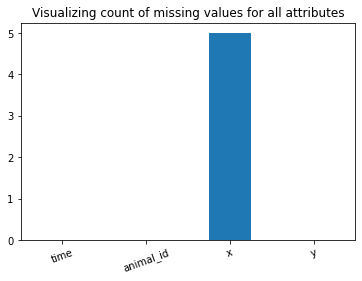

In [14]:
# print missing data
# mkit.print_missing(data)
# mkit.plot_missing_values

#for demonstration set all x values at time period 3 to NaN
missing_data = data
missing_data.loc[interpolated_data['time'] == 3, 'x'] = np.NaN

mkit.print_missing(missing_data)
mkit.plot_missing_values(missing_data)

One can also explore the rows, which are duplicates.

In [15]:
# OPTIONAL: print rows, which are duplicates
# mkit.print_duplicate(data)

#for demonstration double all rows at time period 3 to NaN
duplicate_data = data.loc[data['time'] == 2,:]
duplicate_data = pd.concat([data,duplicate_data])

mkit.print_duplicate(duplicate_data)

Duplicate rows based on the columns 'animal_id' and 'time' column are:
   time  animal_id          x          y
5     2        312  49.666681  84.851367
6     2        511  44.691556  87.383880
7     2        607  47.544149  82.312218
8     2        811  55.328175  83.721136
9     2        905  44.106662  92.457755


It is possible to remove specific movers if they are not of interest for the analysis.

In [16]:
# delete a specified mover from the data
# mkit.delete_mover(data, animal_id)

data_without_312 = mkit.delete_mover(data, 312)
data_without_312

,time,animal_id,x,y
1,1,511,44.688738,87.375033
2,1,607,47.555424,82.312218
3,1,811,55.281665,83.650358
4,1,905,44.134850,92.457755
6,2,511,44.691556,87.383880
...,...,...,...,...
4994,999,905,87.759503,32.761214
4996,1000,511,85.923076,42.367071
4997,1000,607,94.406156,58.081925
4998,1000,811,100.000000,60.574626


#### Making a pandas DataFrame compatible with `movekit`

If one has the data stored in a Pandas DataFrame one can easily make the DataFrame compatible with `movekit`.

In [17]:
# convert an existing pandas dataframe such that it is compatible with movekit.
# mkit.from_dataframe(data, dictionary)

#Parameters:
# data: the existing data frame
# dictionary: Key-value pairs of column names. Keys store the old column names. The respective new column names are stored as their values. Values that need to be defined include 'time', 'animal_id', 'x' and 'y'.

wrong_df = pd.DataFrame({'Time':[0,1,2,3],'IDs':['A','B','C','D'],'x-values':[0,1,2,3],'y-values':[5,6,7,8]})
correct_df = mkit.from_dataframe(wrong_df, {'Time': 'time', 'IDs': 'animal_id', 'x-values': 'x', 'y-values': 'y'})
correct_df

,time,animal_id,x,y
0,0,A,0,5
1,1,B,1,6
2,2,C,2,7
3,3,D,3,8


It can be beneficial to save the preprocessed data to a new csv-file.

In [18]:
# OPTIONAL: save cleaned features to csv 
preprocessed_data.to_csv("datasets/fish-5-cleaned.csv", index=False)

#### Support for 3d datasets

`movekit` also supports movement in three dimensions. All function calls remain the same for the user as the presence of a third dimension in the data is recognized by `movekit`.

Below we show an example of a 3D dataset that can be given to `movekit`.

In [19]:
# create a synthetic 3D dataset by appending a third dimension to the 2D dataset from above
z = np.random.normal(loc=0.0, scale=1.0, size=len(preprocessed_data))
preprocessed_data['z'] = z
preprocessed_data

,time,animal_id,x,y,z
0,1,312,49.663862,84.937627,1.070892
1,1,511,44.688738,87.375033,0.812077
2,1,607,47.555424,82.312218,-0.931835
3,1,811,55.281665,83.650358,0.901852
4,1,905,44.134850,92.457755,-1.085766
...,...,...,...,...,...
4995,1000,312,94.153877,46.638061,-0.284544
4996,1000,511,85.923076,42.367071,1.598258
4997,1000,607,94.406156,58.081925,-0.482911
4998,1000,811,100.000000,60.574626,-1.847137


#### Support for geographic coordinates

`movekit` is able to project data from GPS coordinates in the latitude and longitude format to the cartesian coordinate system.

In [20]:
path = "./datasets/geo.csv"

# Read in file using 
geo_data = pd.read_csv(path, sep=';')
geo_data.head()

,time,animal_id,latitude,longitude
0,1,1,47.691358,9.176731
1,1,2,52.472161,13.402034
2,1,3,47.692101,9.055353


In [21]:
# mkit.convert_latlon(data, latitude='latitude', longitude='longitude', replace=True)

#Parameters:
#data: DataFrame with GPS coordinates
#latitude: str. Name of the column where latitude is stored
#longitude: str. Name of the column where longitude is stored
#replace: bool. Flag whether the xy columns should replace the latlon columns
#return: DataFrame after the transformation where latitude is projected into y and longitude is projected into x

projected_data = mkit.convert_latlon(geo_data)
projected_data.head()

/Users/timkleinlein/opt/anaconda3/lib/python3.9/site-packages/movekit-0.0.post1.dev281+g535ff04.d20220301-py3.9.egg/movekit/preprocess.py:380: UserWarning: Input data spans multiple UTM zones. Projection into plane will likely be inaccurate.
  warnings.warn("Input data spans multiple UTM zones. Projection into plane will likely be inaccurate.")


,time,animal_id,x,y
0,1,1,513261.777038,5.282012e+06
1,1,2,391460.276950,5.814756e+06
2,1,3,504153.593963,5.282081e+06
